## Agent-Based Model for Wealth
Agent-Based model of sacrifices/taxes based on the affine wealth model from Bruce M. Boghosian

"Is Inequality Inevitable?", Bruce M. Boghosian, Scientific American, October 30, 2019

"Follow the money", Brian Hayes, American Scientist, Vol. 90, 2002, 400-405

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

### The agents

In [2]:
class Agent: 
  def __init__(self, money = 10.0, stake = 0.10):
    self.wealth = money
    self.stake = stake

  def tax_wealth(self, rate):
    taxes = self.wealth * rate
    self.subtract_wealth(taxes)
    return taxes

  def subtract_wealth(self, amount):
    self.wealth = self.wealth - amount

  def add_wealth(self, amount):
    self.wealth = self.wealth + amount
              
  def interact(self, opponent):
    min_wealth = min(self.wealth, opponent.wealth)
    stake = min_wealth * self.stake
    flip = random.randint(0, 1)
    if (flip == 0):
      self.add_wealth(stake)
      opponent.subtract_wealth(stake)
    else:
      self.subtract_wealth(stake)
      opponent.add_wealth(stake)
        

In [3]:
a = Agent()
b = Agent()
a.interact(b)
a.interact(b)
a.interact(b)
a.interact(b)
a.interact(b)
print("Agent A wealth", a.wealth)
print("Agent B wealth", b.wealth)

Agent A wealth 10.7811
Agent B wealth 9.2189


### The agent based model

In [4]:
class AgentBasedModel:
  def __init__(self, n, rate = 0):
    self.apply_taxes = rate > 0
    self.tax_rate = rate
    self.agents = n
    self.model = []
    self.data = []
    for x in range(self.agents): self.model.append(Agent())
        
  def random_agent(self):
    i = random.randrange(0, self.agents)
    return self.model[i]

  def play(self, timestep):
    agent1 = self.random_agent()
    agent2 = agent1
    while (agent1 == agent2): 
      agent2 = self.random_agent()
    agent1.interact(agent2)
      
    if self.apply_taxes:
      taxed_agent = self.random_agent()
      taxes = taxed_agent.tax_wealth(self.tax_rate) / self.agents
      for x in range(self.agents):
        agent = self.random_agent()
        if agent != taxed_agent: agent.add_wealth(taxes) 

  def wealth_distribution(self):
    return [agent.wealth for agent in self.model]

  def wealth_grouped(self, groups = 25):
    distribution = self.wealth_distribution()
    df = pd.DataFrame(distribution, columns=['Wealth'])
    bins = np.arange(0, groups, 1)
    return list(df.groupby(pd.cut(df.Wealth, bins)).size().reset_index()[0])   

  def run(self, timesteps):
    for t in range(timesteps):
      self.play(t)

In [5]:
iterations = 50000
x_1 = AgentBasedModel(250, 0)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped() , 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}  
df_0 = pd.DataFrame(dict)
df_0['Wealth'] = df_0.mean(axis=1)
df_0.head()

,w1,w2,w3,w4,w5,Wealth
0,71,74,77,73,71,73.2
1,28,25,23,23,29,25.6
2,20,20,16,17,15,17.6
3,17,11,13,14,16,14.2
4,7,9,9,8,7,8.0


In [6]:
x_1 = AgentBasedModel(250, 0.01)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0.01)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0.01)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0.01)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0.01)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped(), 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}
df_1 = pd.DataFrame(dict)
df_1['Wealth'] = df_1.mean(axis=1)
df_1.head()

,w1,w2,w3,w4,w5,Wealth
0,0,0,0,0,0,0.0
1,6,6,3,12,6,6.6
2,18,24,28,20,15,21.0
3,27,26,28,31,28,28.0
4,24,22,21,15,19,20.2


In [7]:
x_1 = AgentBasedModel(250, 0.02)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0.02)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0.02)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0.02)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0.02)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped(), 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}
df_2 = pd.DataFrame(dict)
df_2['Wealth'] = df_2.mean(axis=1)
df_2.head()

,w1,w2,w3,w4,w5,Wealth
0,0,0,0,0,0,0.0
1,1,1,1,0,3,1.2
2,6,9,8,3,9,7.0
3,17,16,12,21,15,16.2
4,25,20,19,29,24,23.4


In [8]:
x_1 = AgentBasedModel(250, 0.03)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0.03)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0.03)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0.03)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0.03)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped(), 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}
df_3 = pd.DataFrame(dict)
df_3['Wealth'] = df_3.mean(axis=1)
df_3.head()

,w1,w2,w3,w4,w5,Wealth
0,0,0,0,0,0,0.0
1,0,0,0,0,0,0.0
2,6,4,3,1,4,3.6
3,11,11,11,14,11,11.6
4,15,19,17,23,26,20.0


In [9]:
x_1 = AgentBasedModel(250, 0.04)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0.04)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0.04)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0.04)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0.04)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped(), 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}
df_4 = pd.DataFrame(dict)
df_4['Wealth'] = df_4.mean(axis=1)
df_4.head()

,w1,w2,w3,w4,w5,Wealth
0,0,0,0,0,0,0.0
1,0,0,0,0,0,0.0
2,1,0,2,3,1,1.4
3,7,5,9,2,6,5.8
4,13,16,19,21,23,18.4


In [10]:
x_1 = AgentBasedModel(250, 0.05)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0.05)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0.05)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0.05)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0.05)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped(), 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}
df_5 = pd.DataFrame(dict)
df_5['Wealth'] = df_5.mean(axis=1)
df_5.head()

,w1,w2,w3,w4,w5,Wealth
0,0,0,0,0,0,0.0
1,0,0,0,0,0,0.0
2,0,0,0,1,0,0.2
3,7,8,6,7,5,6.6
4,19,13,12,15,16,15.0


In [11]:
x_1 = AgentBasedModel(250, 0.06)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0.06)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0.06)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0.06)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0.06)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped(), 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}
df_6 = pd.DataFrame(dict)
df_6['Wealth'] = df_6.mean(axis=1)
df_6.head()


,w1,w2,w3,w4,w5,Wealth
0,0,0,0,0,0,0.0
1,0,0,0,0,0,0.0
2,0,0,0,0,0,0.0
3,4,11,5,4,3,5.4
4,13,12,10,16,7,11.6


In [12]:
x_1 = AgentBasedModel(250, 0.07)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0.07)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0.07)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0.07)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0.07)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped(), 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}
df_7 = pd.DataFrame(dict)
df_7['Wealth'] = df_7.mean(axis=1)
df_7.head()

,w1,w2,w3,w4,w5,Wealth
0,0,0,0,0,0,0.0
1,0,0,0,0,0,0.0
2,0,0,1,1,0,0.4
3,2,4,2,3,3,2.8
4,14,8,9,15,8,10.8


In [13]:
x_1 = AgentBasedModel(250, 0.08)
x_1.run(iterations)
x_2 = AgentBasedModel(250, 0.08)
x_2.run(iterations)
x_3 = AgentBasedModel(250, 0.08)
x_3.run(iterations)
x_4 = AgentBasedModel(250, 0.08)
x_4.run(iterations)
x_5 = AgentBasedModel(250, 0.08)
x_5.run(iterations)
dict = {'w1': x_1.wealth_grouped(), 'w2': x_2.wealth_grouped(), 'w3': x_3.wealth_grouped(), 'w4': x_4.wealth_grouped(), 'w5': x_5.wealth_grouped()}
df_8 = pd.DataFrame(dict)
df_8['Wealth'] = df_8.mean(axis=1)
df_8.head()

,w1,w2,w3,w4,w5,Wealth
0,0,0,0,0,0,0.0
1,0,0,0,0,0,0.0
2,0,0,1,0,0,0.2
3,3,4,3,3,1,2.8
4,7,11,11,12,14,11.0


### Wealth distribution

Wealth for the simple "yard sale model" without taxes follows a Pareto distribution

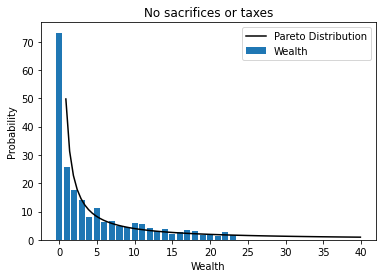

In [14]:
%matplotlib inline

from scipy.stats import pareto 
t = np.arange(0.9, 40., 0.5)
R = pareto.pdf(x=t, b=0.05, loc=0, scale=0.1) * 1000 
p2 = plt.bar(range(24), df_0.Wealth, label="Wealth")
p1 = plt.plot(t, R, label="Pareto Distribution", color="black")
plt.ylabel('Probability')
plt.xlabel('Wealth')
plt.title('No sacrifices or taxes')

plt.legend()
plt.show()

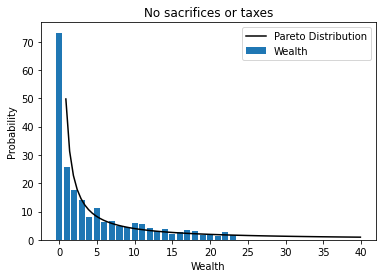

In [15]:
mpl.use('svg')

p2 = plt.bar(range(24), df_0.Wealth, label="Wealth")
p1 = plt.plot(t, R, label="Pareto Distribution", color="black")
plt.ylabel('Probability')
plt.xlabel('Wealth')
plt.title('No sacrifices or taxes')
plt.legend()

plt.savefig("WealthDistributionNoTaxes.svg", format="svg")

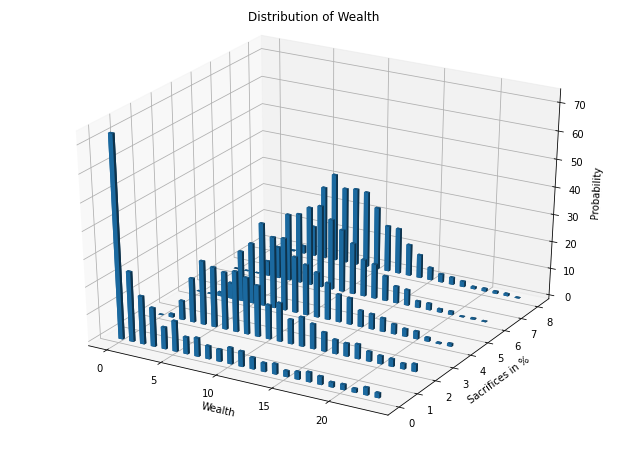

In [16]:
%matplotlib inline

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

series = 5
n = 24
bins = np.arange(0,n+1,1)
d = list(df_0.Wealth) + list(df_2.Wealth) + list(df_4.Wealth) + list(df_6.Wealth) + list(df_8.Wealth)

_x = np.arange(n)
_y = np.arange(0, (series*2), 2)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

bottom = np.zeros_like(d)
width = 0.4
depth = 0.1

ax.bar3d(x, y, bottom, width, depth, d, shade=True)
ax.set_title('Distribution of Wealth\n')
ax.set_ylabel('Sacrifices in %')
ax.set_xlabel('Wealth')
ax.set_zlabel('Probability')

plt.show()

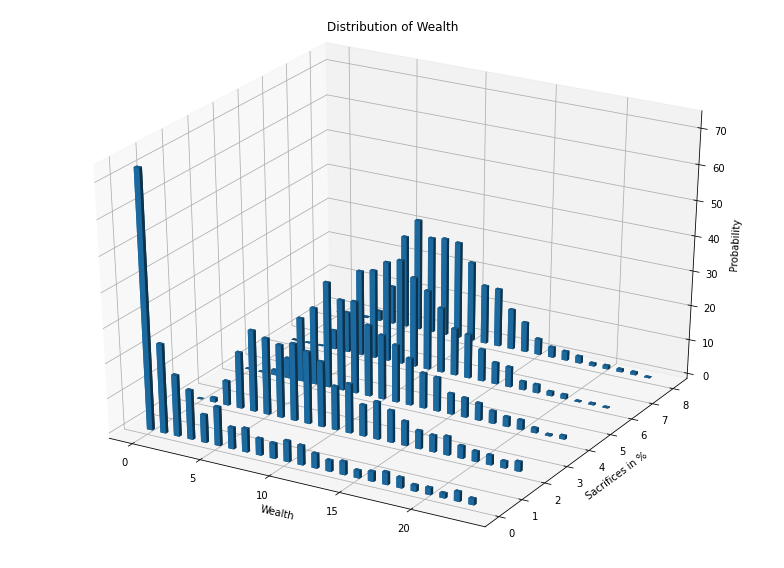

In [17]:
mpl.use('svg')

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

series = 5
n = 24
bins = np.arange(0,n+1,1)
d = list(df_0.Wealth) + list(df_2.Wealth) + list(df_4.Wealth) + list(df_6.Wealth) + list(df_8.Wealth)

_x = np.arange(n)
_y = np.arange(0, (series*2), 2)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

bottom = np.zeros_like(d)
width = 0.4
depth = 0.1

ax.bar3d(x, y, bottom, width, depth, d, shade=True)
ax.set_title('Distribution of Wealth\n')
ax.set_ylabel('Sacrifices in %')
ax.set_xlabel('Wealth')
ax.set_zlabel('Probability')
fig.set_tight_layout(True)
plt.savefig("WealthDistributionTaxes3D.svg", format="svg")

Text(0.5, 0, 'Probability')

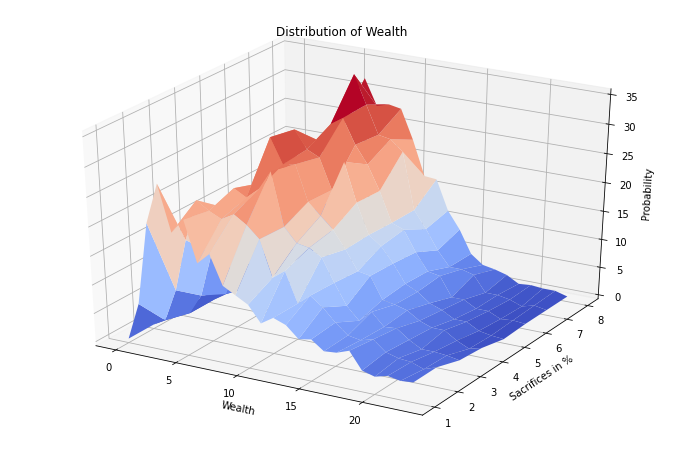

In [18]:
%matplotlib inline
series = 8
bins = np.arange(0,25.0,1)
n = len(bins) - 1
d =  list(df_1.Wealth) + list(df_2.Wealth) + list(df_3.Wealth) + list(df_4.Wealth) + list(df_5.Wealth) + list(df_6.Wealth) + list(df_7.Wealth) + list(df_8.Wealth)

_x = np.arange(n)
_y = np.arange(1, series+1, 1)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
data = np.array(d).reshape((series, n))
ax.plot_surface(_xx, _yy, data, cmap=cm.coolwarm)
# ax.plot_wireframe(_xx, _yy, data)
ax.set_title('Distribution of Wealth')
ax.set_ylabel('Sacrifices in %')
ax.set_xlabel('Wealth')
ax.set_zlabel('Probability')

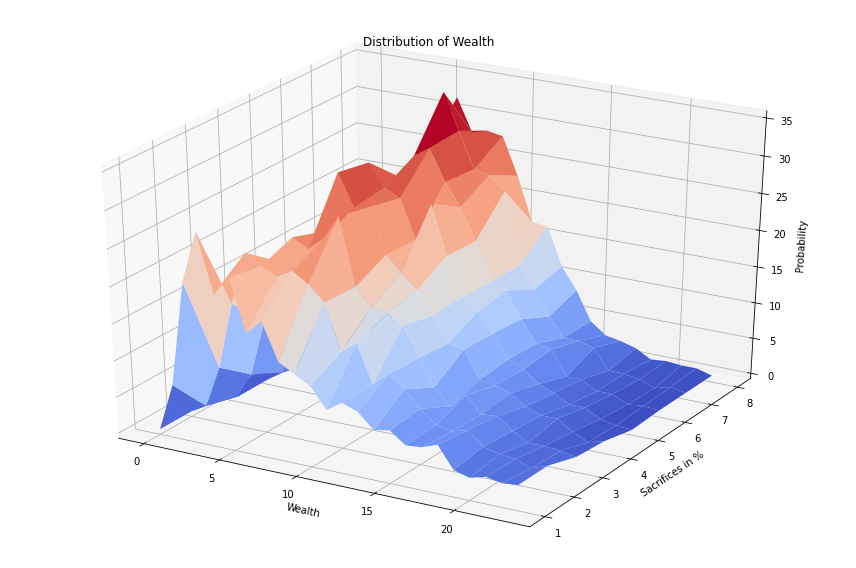

In [19]:
mpl.use('svg')
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
data = np.array(d).reshape((series, n))
ax.plot_surface(_xx, _yy, data, cmap=cm.coolwarm)
ax.set_title('Distribution of Wealth')
ax.set_ylabel('Sacrifices in %')
ax.set_xlabel('Wealth')
ax.set_zlabel('Probability')
fig.set_tight_layout(True)
plt.savefig("WealthDistributionTaxes3DSurface.svg", format="svg")

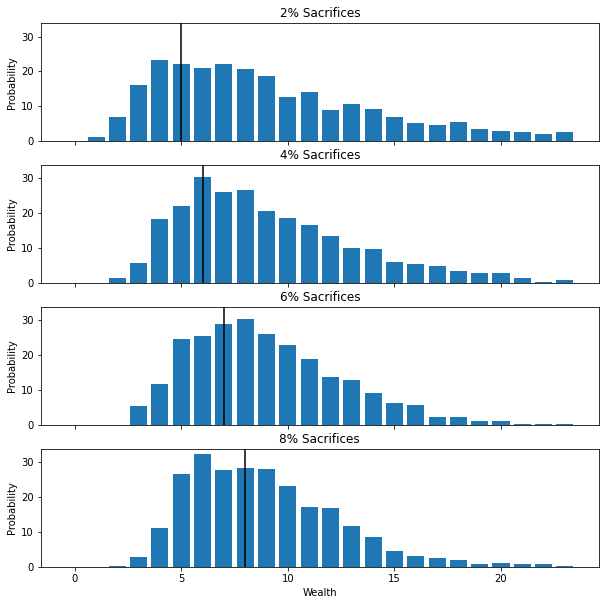

In [20]:
%matplotlib inline
fig, axs = plt.subplots(4, 1, figsize=(10,10), sharex=True, sharey=True)
axs[0].bar(range(24), df_2.Wealth)
axs[0].axvline(x=float(5.0), color="Black")
axs[0].set_title('2% Sacrifices')

axs[1].bar(range(24), df_4.Wealth)
axs[1].axvline(x=float(6.0), color="Black")
axs[1].set_title('4% Sacrifices')

axs[2].bar(range(24), df_6.Wealth)
axs[2].axvline(x=float(7.0), color="Black")
axs[2].set_title('6% Sacrifices')

axs[3].bar(range(24), df_8.Wealth)
axs[3].axvline(x=float(8.0), color="Black")
axs[3].set_title('8% Sacrifices')
for ax in axs.flat:
    ax.set(xlabel='Wealth', ylabel='Probability')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.show()

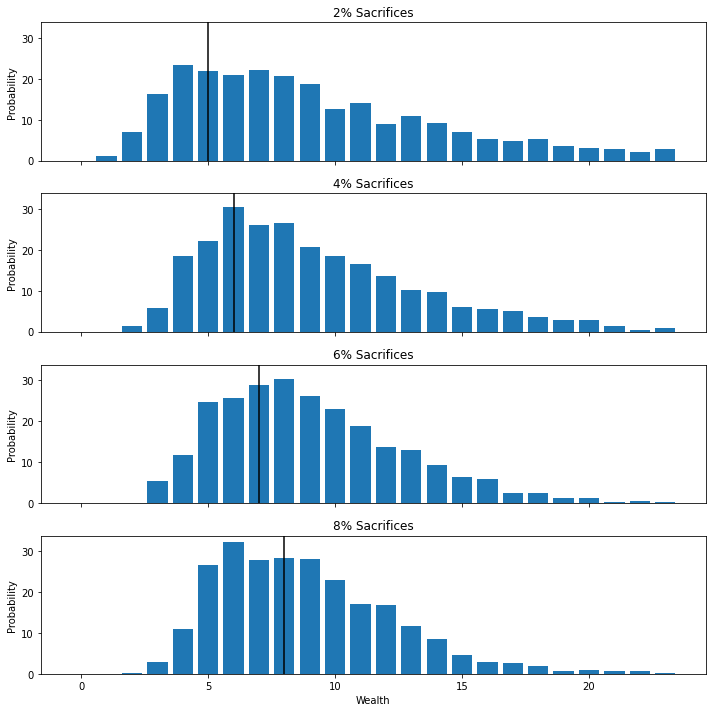

In [21]:
mpl.use('svg')

fig, axs = plt.subplots(4, 1, figsize=(10,10), sharex=True, sharey=True)
axs[0].bar(range(24), df_2.Wealth)
axs[0].axvline(x=float(5.0), color="Black")
axs[0].set_title('2% Sacrifices')

axs[1].bar(range(24), df_4.Wealth)
axs[1].axvline(x=float(6.0), color="Black")
axs[1].set_title('4% Sacrifices')

axs[2].bar(range(24), df_6.Wealth)
axs[2].axvline(x=float(7.0), color="Black")
axs[2].set_title('6% Sacrifices')

axs[3].bar(range(24), df_8.Wealth)
axs[3].axvline(x=float(8.0), color="Black")
axs[3].set_title('8% Sacrifices')

fig.set_tight_layout(True)

for ax in axs.flat:
    ax.set(xlabel='Wealth', ylabel='Probability')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig("WealthDistributionTaxes.svg", format="svg")